In [31]:
import pandas as pd
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

In [9]:
data = pd.read_csv('umfragedaten_v1_an.csv')

In [10]:
data = data.drop(data[data.NETTO.isna()].index)
data = data.drop(data[data.RAUCH.isna()].index)

In [18]:
data.RAUCH = data.RAUCH.replace('JA',1)
data.RAUCH = data.RAUCH.replace('NEIN',0)

In [51]:
x = np.array(data.NETTO.values).reshape(-1,1)
x

array([[ 475.],
       [ 780.],
       [4000.],
       ...,
       [1500.],
       [1300.],
       [1100.]])

In [52]:
y = np.array(data.RAUCH)
y

array([1, 0, 0, ..., 0, 0, 0])

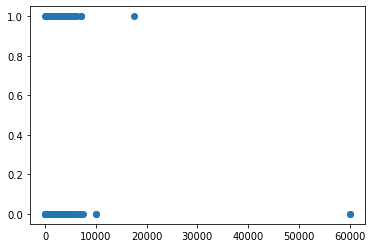

In [33]:
plt.scatter(x,y)
plt.show()

In [53]:
model = LogisticRegression()

In [54]:
model.fit(x,y)

LogisticRegression()

In [55]:
model.classes_

array([0, 1])

In [49]:
model.coef_

array([[1.31300179e-05]])

In [45]:
model.intercept_

array([-0.89535812])

In [57]:
y_pred = model.predict(x)
confusion_matrix(x,y_pred)

array([[0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [3, 0, 0, ..., 0, 0, 0],
       ...,
       [2, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [2, 0, 0, ..., 0, 0, 0]])

In [56]:
y_pred = model.predict(x)
confusion_matrix(y, y_pred)

array([[1916,    0],
       [ 799,    0]])

In [63]:
y_pred2 = model.predict_proba(x)[:,1]
y_pred2

array([0.29129118, 0.29211859, 0.3009374 , ..., 0.2940773 , 0.29353245,
       0.29298818])

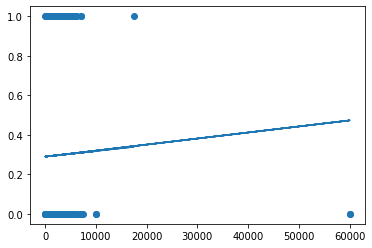

In [65]:
plt.scatter(x,y)
plt.plot(x,y_pred2)